# Data Exploration and Cleaning


Installing Pyspark module

In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pyspark 
from pyspark.sql import SparkSession
import numpy as np
import pandas as pd
import panel as pn
import seaborn as sns
from matplotlib import pyplot as plt
from panel.interact import interact
pn.extension()

Creating Spark Session

In [ ]:
spark = SparkSession.builder.appName('Employee App').getOrCreate()

In [ ]:
#Reading the datasets
emp_df=spark.read.csv('emp.csv',header=True)
hr_df= spark.read.csv('HR_comma_sep.csv',header=True)

Exploring the data

In [ ]:
#Checking the columns of employee dataset
emp_df.printSchema()

root
 |-- EmpId: string (nullable = true)
 |-- User Id: string (nullable = true)
 |-- First Name: string (nullable = true)
 |-- Last Name: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Email: string (nullable = true)
 |-- Phone: string (nullable = true)
 |-- Date of birth: string (nullable = true)
 |-- Department: string (nullable = true)



In [ ]:
#Checking the columns of hr dataset
hr_df.printSchema()

root
 |-- EmpId: string (nullable = true)
 |-- satisfaction_level: string (nullable = true)
 |-- last_evaluation: string (nullable = true)
 |-- number_project: string (nullable = true)
 |-- average_montly_hours: string (nullable = true)
 |-- time_spend_company: string (nullable = true)
 |-- Work_accident: string (nullable = true)
 |-- left: string (nullable = true)
 |-- promotion_last_5years: string (nullable = true)
 |-- sales: string (nullable = true)
 |-- salary: string (nullable = true)
 |-- Department: string (nullable = true)



In [ ]:
#Rows in emp dataset
emp_df.show(5)

+-----+---------------+----------+---------+------+--------------------+--------------------+-------------+----------+
|EmpId|        User Id|First Name|Last Name|   Sex|               Email|               Phone|Date of birth|Department|
+-----+---------------+----------+---------+------+--------------------+--------------------+-------------+----------+
|23001|e09c4f4cbfEFaFd|      Dawn|  Trevino|  Male|clintongood@examp...|        360-423-5286|    1/17/1972|     sales|
|23002|D781D28b845Ab9D|      Dale| Mcknight|  Male|clairebradshaw@ex...|          9062423229|    1/31/1931|     sales|
|23003|eda7EcaF87b2D80|   Herbert|     Bean|Female|johnnybooker@exam...|001-149-154-0679x...|    2/10/2018|     sales|
|23004|E75ACea5D7AeC3e|     Karen|  Everett|Female|   wkhan@example.org|  870.294.7563x20939|    6/14/1938|     sales|
|23005|9C4Df1246ddf543|    Angela|     Shea|  Male|reginaldgarner@ex...|        242.442.2978|   11/22/1971|     sales|
+-----+---------------+----------+---------+----

In [ ]:
#Rows in HR dataset
hr_df.show(5)

+-----+------------------+---------------+--------------+--------------------+------------------+-------------+----+---------------------+-----+------+----------+
|EmpId|satisfaction_level|last_evaluation|number_project|average_montly_hours|time_spend_company|Work_accident|left|promotion_last_5years|sales|salary|Department|
+-----+------------------+---------------+--------------+--------------------+------------------+-------------+----+---------------------+-----+------+----------+
|23001|              0.38|           0.53|             2|                 157|                 3|            0|   1|                    0|sales|   low|     sales|
|23002|               0.8|           0.86|             5|                 262|                 6|            0|   1|                    0|sales|medium|     sales|
|23003|              0.11|           0.88|             7|                 272|                 4|            0|   1|                    0|sales|medium|     sales|
|23004|              0

In [ ]:
emp_df=emp_df.toPandas()
hr_df=hr_df.toPandas()

In [ ]:
emp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16383 entries, 0 to 16382
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   EmpId          16383 non-null  object
 1   User Id        16383 non-null  object
 2   First Name     16383 non-null  object
 3   Last Name      16383 non-null  object
 4   Sex            16383 non-null  object
 5   Email          16383 non-null  object
 6   Phone          16383 non-null  object
 7   Date of birth  16383 non-null  object
 8   Department     14999 non-null  object
dtypes: object(9)
memory usage: 1.1+ MB


In [ ]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16383 entries, 0 to 16382
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   EmpId                  16383 non-null  object
 1   satisfaction_level     14999 non-null  object
 2   last_evaluation        14999 non-null  object
 3   number_project         14999 non-null  object
 4   average_montly_hours   14999 non-null  object
 5   time_spend_company     14999 non-null  object
 6   Work_accident          14999 non-null  object
 7   left                   14999 non-null  object
 8   promotion_last_5years  14999 non-null  object
 9   sales                  14999 non-null  object
 10  salary                 14999 non-null  object
 11  Department             14999 non-null  object
dtypes: object(12)
memory usage: 1.5+ MB


Data Cleaning

In [ ]:
#Removing the additional
emp_df.dropna(subset=['Department'], inplace=True)
emp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   EmpId          14999 non-null  object
 1   User Id        14999 non-null  object
 2   First Name     14999 non-null  object
 3   Last Name      14999 non-null  object
 4   Sex            14999 non-null  object
 5   Email          14999 non-null  object
 6   Phone          14999 non-null  object
 7   Date of birth  14999 non-null  object
 8   Department     14999 non-null  object
dtypes: object(9)
memory usage: 1.1+ MB


In [ ]:
#dropping additional empids
hr_df.dropna(subset=['Department'],inplace=True)
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14999 entries, 0 to 14998
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   EmpId                  14999 non-null  object
 1   satisfaction_level     14999 non-null  object
 2   last_evaluation        14999 non-null  object
 3   number_project         14999 non-null  object
 4   average_montly_hours   14999 non-null  object
 5   time_spend_company     14999 non-null  object
 6   Work_accident          14999 non-null  object
 7   left                   14999 non-null  object
 8   promotion_last_5years  14999 non-null  object
 9   sales                  14999 non-null  object
 10  salary                 14999 non-null  object
 11  Department             14999 non-null  object
dtypes: object(12)
memory usage: 1.5+ MB


In [ ]:
#Checking na values in each column
hr_df.isna().sum()

EmpId                    0
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
Department               0
dtype: int64

In [ ]:
#Checking duplications
hr_df[hr_df.duplicated()]

,EmpId,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,Department


In [ ]:
#Cleaning wrong phone numbers with default number
emp_df.loc[emp_df['Phone'].str.len() < 10, 'Phone'] = '+9 999 999 9999'

In [ ]:
hr_df.drop('sales',axis=1)

,EmpId,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,Department
0,23001,0.38,0.53,2,157,3,0,1,0,low,sales
1,23002,0.8,0.86,5,262,6,0,1,0,medium,sales
2,23003,0.11,0.88,7,272,4,0,1,0,medium,sales
3,23004,0.72,0.87,5,223,5,0,1,0,low,sales
4,23005,0.37,0.52,2,159,3,0,1,0,low,sales
...,...,...,...,...,...,...,...,...,...,...,...
14994,37995,0.4,0.57,2,151,3,0,1,0,low,support
14995,37996,0.37,0.48,2,160,3,0,1,0,low,support
14996,37997,0.37,0.53,2,143,3,0,1,0,low,support
14997,37998,0.11,0.96,6,280,4,0,1,0,low,support


In [ ]:
 #convert to numeric
hr_df[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','left','promotion_last_5years']]
=hr_df[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','left','promotion_last_5years']].apply(pd.to_numeric)


In [ ]:
data = pd.merge(emp_df,hr_df)
data.head()

,EmpId,User Id,First Name,Last Name,Sex,Email,Phone,Date of birth,Department,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,23001,e09c4f4cbfEFaFd,Dawn,Trevino,Male,clintongood@example.org,360-423-5286,1/17/1972,sales,0.38,0.53,2,157,3,0,1,0,sales,low
1,23002,D781D28b845Ab9D,Dale,Mcknight,Male,clairebradshaw@example.org,9062423229,1/31/1931,sales,0.80,0.86,5,262,6,0,1,0,sales,medium
2,23003,eda7EcaF87b2D80,Herbert,Bean,Female,johnnybooker@example.org,001-149-154-0679x1617,2/10/2018,sales,0.11,0.88,7,272,4,0,1,0,sales,medium
3,23004,E75ACea5D7AeC3e,Karen,Everett,Female,wkhan@example.org,870.294.7563x20939,6/14/1938,sales,0.72,0.87,5,223,5,0,1,0,sales,low
4,23005,9C4Df1246ddf543,Angela,Shea,Male,reginaldgarner@example.com,242.442.2978,11/22/1971,sales,0.37,0.52,2,159,3,0,1,0,sales,low


# Visualising the dataset

Calculate the mean to check differences in employees who are in company and left the company

In [ ]:
left = hr_df.groupby('left')
left.mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


Statistics of dataset

In [ ]:
hr_df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


No of employee working and left the company

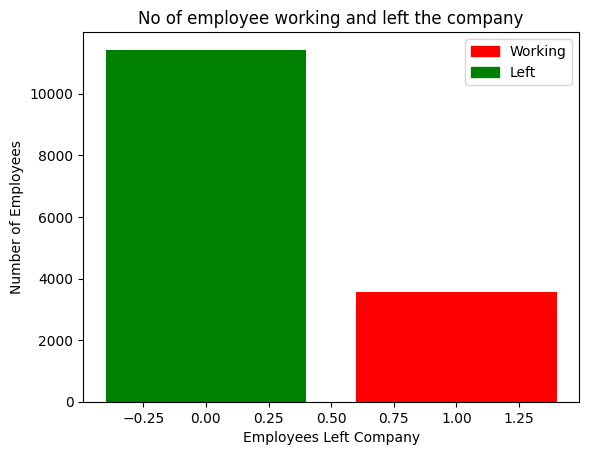

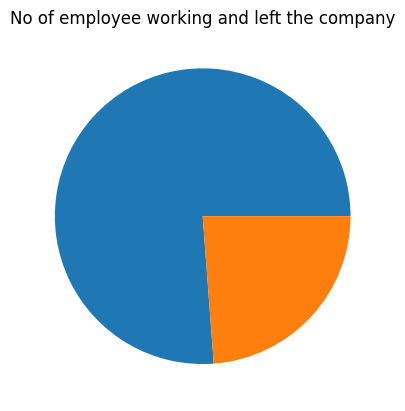

In [ ]:
left_count=data.groupby('left').count()
plt.title('No of employee working and left the company')
plt.xlabel('Employees Left Company')
plt.ylabel('Number of Employees')

colors = {'Working':'red', 'Left':'green'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)

plt.bar(left_count.index.values, left_count['EmpId'],color=['green', 'red'])
plt.show()
plt.title('No of employee working and left the company')
plt.pie( left_count['EmpId'])
plt.show()


In [ ]:
data.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

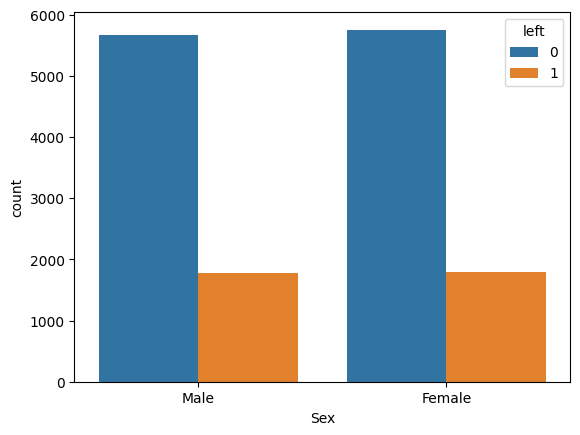

In [ ]:
plt.title("Count of ma")
plt.xlabel('Number of Projects')
plt.ylabel('Number of Employees')
sns.countplot(x='Sex',data=data, hue='left')
plt.show()

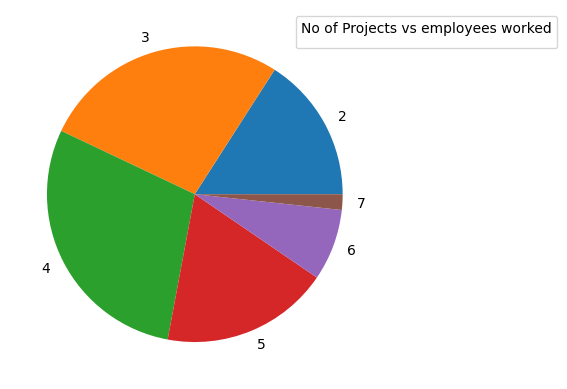

In [ ]:
num_projects=data.groupby('number_project').count()
ax = plt.gca()
for p in ax.patches:
  ax.text(p.get_x() + p.get_width()/2, p.get_height(), f"{p.get_height():.2f}", ha="center")

labels= num_projects.index.values
ax.legend(title='No of Projects vs employees worked', loc='upper right', bbox_to_anchor=(1, 0, 0.5, 1))

plt.pie(num_projects['EmpId'],labels=labels)
plt.show()

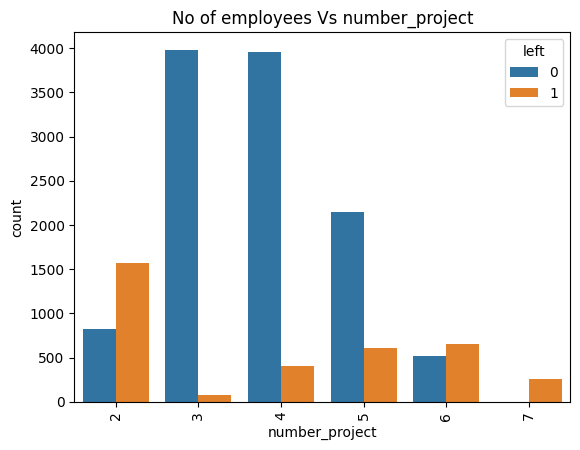

In [ ]:
def ShowChartByFeature(feature):
    plt.title("No of employees Vs "+feature)
    sns.countplot(x=feature,data = data, hue='left')
    plt.xticks(rotation=90)
    

ShowChartByFeature('number_project')

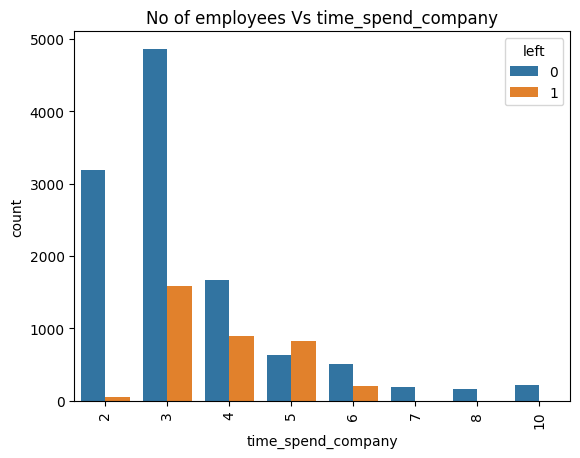

In [ ]:
ShowChartByFeature('time_spend_company')

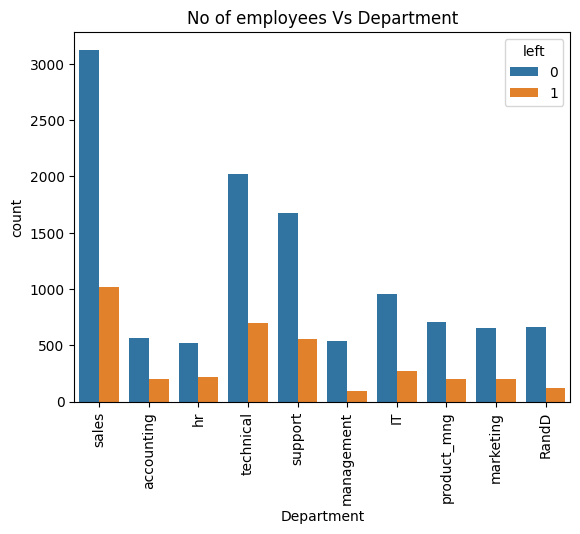

In [ ]:
ShowChartByFeature('Department')

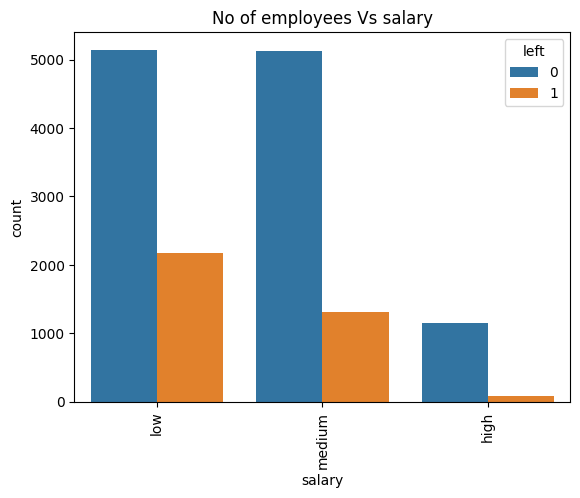

In [ ]:
ShowChartByFeature('salary') #Salary also play a key role 

Correlation of features

,Department,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,Departments
Department,1.000000,0.003153,0.007772,0.009268,0.003913,-0.018010,0.003425,0.032105,-0.027336,-0.043081,1.000000
satisfaction_level,0.003153,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.050022,0.003153
last_evaluation,0.007772,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,-0.013002,0.007772
number_project,0.009268,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,-0.001803,0.009268
average_montly_hours,0.003913,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,-0.002242,0.003913
time_spend_company,-0.018010,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,0.048715,-0.018010
Work_accident,0.003425,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.009247,0.003425
left,0.032105,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,-0.157898,0.032105
promotion_last_5years,-0.027336,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,0.098119,-0.027336
salary,-0.043081,0.050022,-0.013002,-0.001803,-0.002242,0.048715,0.009247,-0.157898,0.098119,1.000000,-0.043081


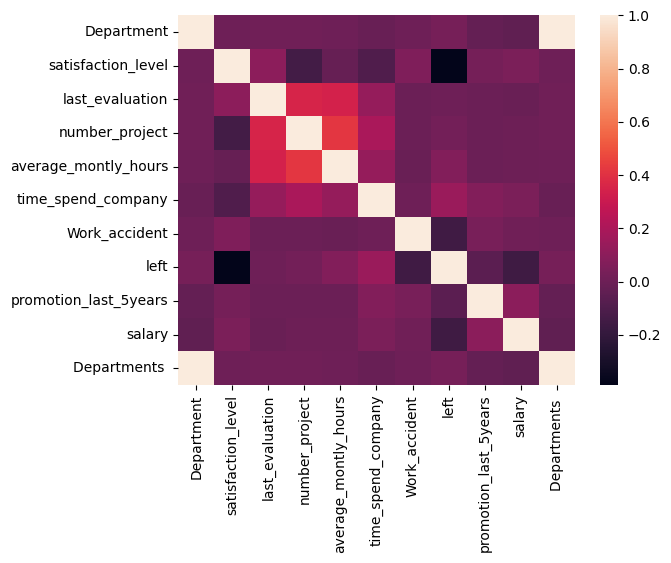

In [ ]:
#This shows how much two features are related to each other range -1 to 1
#Positive  f1 incr f2 incr
#Negative  f1 incr f2 decr
#No Co-relation
#Converting categorical data to numrerical data
mapping = {
    'low': 1,
    'medium': 2,
    'high': 3
}
data['salary']=data['salary'].apply(lambda x: mapping[x])
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns.values,yticklabels=corr.columns.values)
corr

# Analysis

Here we are doing binary classification
How likely Employee will leave or not.
2 outputs 0,1
We use SIGMOID Function





In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#creating labelEncoder
le = preprocessing.LabelEncoder()
#Converting department to numeric variable
data['Department']=le.fit_transform(data['Department'])

#Features - Independant variables whose change effects the result
X=data[['satisfaction_level', 'last_evaluation', 'number_project','average_montly_hours', 'time_spend_company', 'Work_accident','promotion_last_5years', 'Department', 'salary']]
#Dependant variable
y=data['left']

#Here we split the data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

model = LogisticRegression(solver='lbfgs', max_iter=1000)

model.fit(X_train,y_train)


LogisticRegression(max_iter=1000)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("Model Score:",model.score(X_test,y_test))

Model Score: 0.7971111111111111


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7971111111111111
Precision: 0.6009104704097117
Recall: 0.37858508604206503
